In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:
#with open("../ressources/automode_descriptions_evaluated.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed21_n600.pickle", "rb") as file:
with open("../ressources/automode_evaluated_seed14_n300_24-12-15.pickle", "rb") as file:
#with open("../ressources/llm_evaluated_concat_s14n600_s15n600_train_2024-12-12_16.pickle", "rb") as file:
#with open("testdata.pkl", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df["type"] = original_df["parameters"].map(lambda x: type(x.objective_params).__name__)
original_df["original_index"] = original_df.index
original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)
original_df["coeff_of_var"] = original_df["scores"].map(lambda x: x+abs(np.min(x)) + 1 if x is not None else None).map(lambda x: np.std(x)/np.mean(x) if x is not None else None)


/tmp/ipykernel_271779/3181682175.py:3: RuntimeWarning: invalid value encountered in divide
  original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)


In [5]:
group_dfs = {category: group.reset_index(drop=True) for category, group in original_df.groupby("type")}

for group, df in group_dfs.items():
    old_size = len(df)
    cleaned = df.dropna()
    new_size = len(cleaned)
    print(f" {group}:  {old_size=} {new_size=}: ratio: {new_size/float(old_size)}")
    group_dfs[group] = cleaned

 Aggregation:  old_size=66 new_size=65: ratio: 0.9848484848484849
 Connection:  old_size=71 new_size=68: ratio: 0.9577464788732394
 Distribution:  old_size=83 new_size=83: ratio: 1.0
 Foraging:  old_size=80 new_size=80: ratio: 1.0


In [6]:
group_dfs["Aggregation"]

,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,original_index,z-scores,coeff_of_var
0,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.615385, 0.615385, 0.384615, 0.538462, 0.538...",0.607693,Aggregation,0,"[0.06097178325839157, 0.06097178325839157, -1....",0.063325
1,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.625, 1.0, 0.375, 0.625, 0.75, 0.75, 0.625, ...",0.700000,Aggregation,3,"[-0.4999999999999997, 2.0000000000000004, -2.1...",0.072289
2,The arena has a radius of 4.44 m. The arena fe...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.363636, 0.363636, 0.363636, 0.0909091, 0.27...",0.272727,Aggregation,23,"[1.0000001100001041, 1.0000001100001041, 1.000...",0.066667
3,"With a length of 2.17 meters, width of 6.48 me...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,Aggregation,41,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.000000
4,"A rectangular area, with a length of 5.42 mete...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.722222, 0.777778, 0.777778, 0.777778, 0.888...",0.777778,Aggregation,43,"[-0.9128758586758304, 3.286338629613225e-06, 3...",0.024896
...,...,...,...,...,...,...,...,...,...,...,...
61,The environment consists of a rectangular area...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.105263, 0.157895, 0.263158, 0.473684, 0.368...",0.268421,Aggregation,271,"[-1.401869477202736, -0.9496501908414516, -0.0...",0.084725
62,The environment consists of a circular arena w...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.4, 0.3, 0.5, 0.3, 0.4, 0.4, 0.3, 0.4, 0.5, ...",0.380000,Aggregation,275,"[0.2672612419124246, -1.0690449676496976, 1.60...",0.044544
63,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.466667, 0.2, 0.266667, 0.533333, 0.6, 0.333...",0.440000,Aggregation,279,"[0.20412677652038544, -1.8371180247081647, -1....",0.079658
64,"The circular arena, having a radius of 4.75 me...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.5, 0.666667, 0.611111, 0.388889, 0.5, 0.777...",0.588889,Aggregation,287,"[-0.662085221049285, 0.5793254994743045, 0.165...",0.067882


In [7]:
try:
    print(group_dfs["Foraging"][group_dfs["Foraging"]["avg_score"] > 4000].iloc[0].behavior_tree)
except:
    print("not found")

not found


## Distribution of Scores

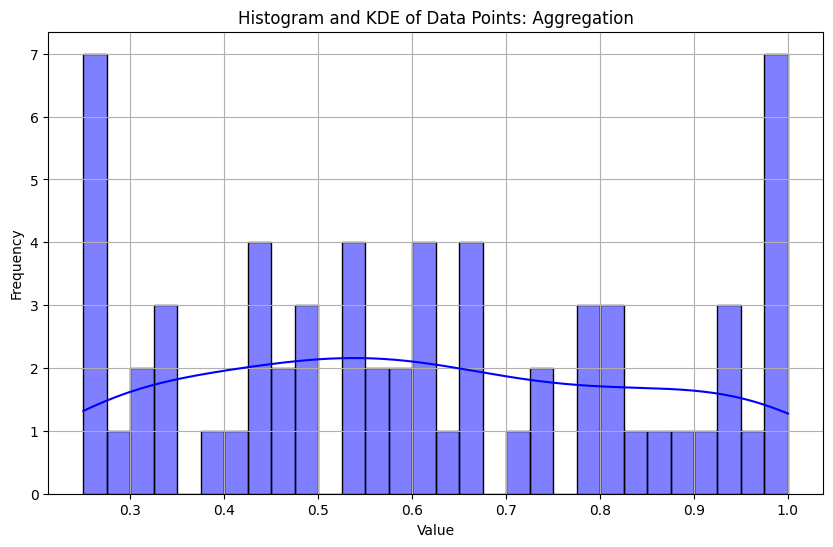

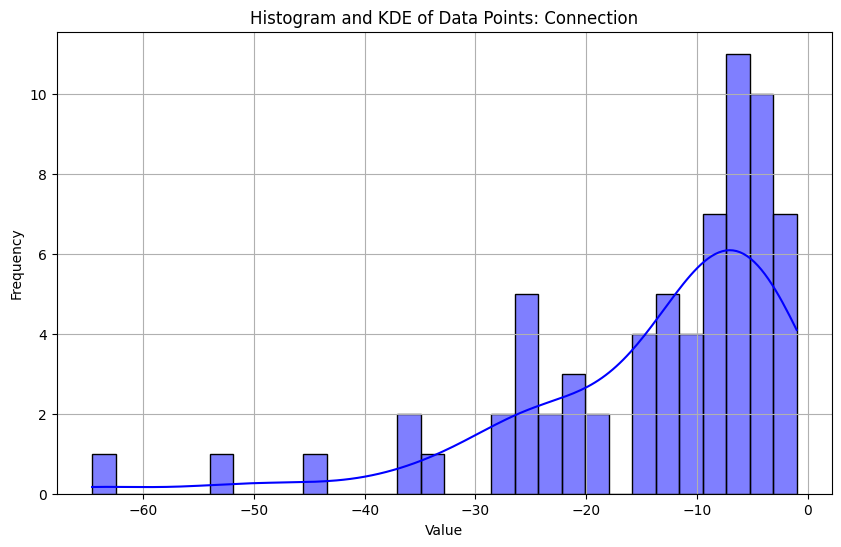

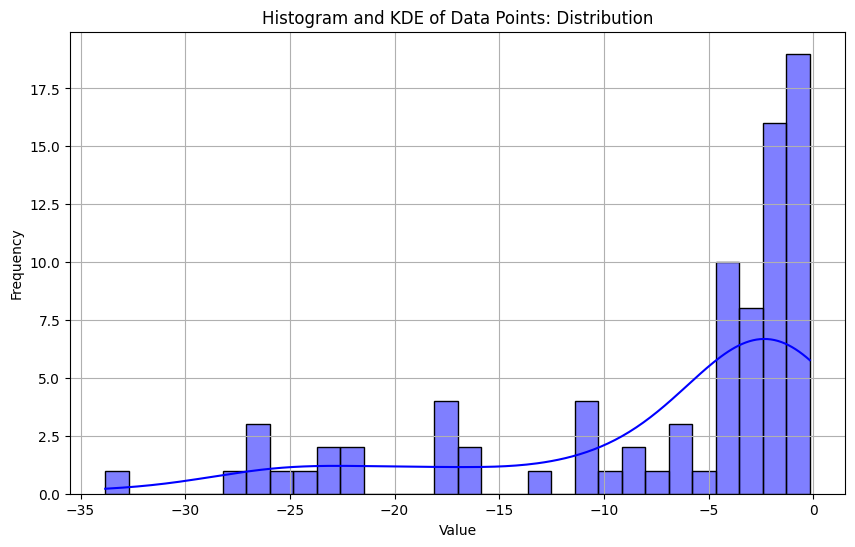

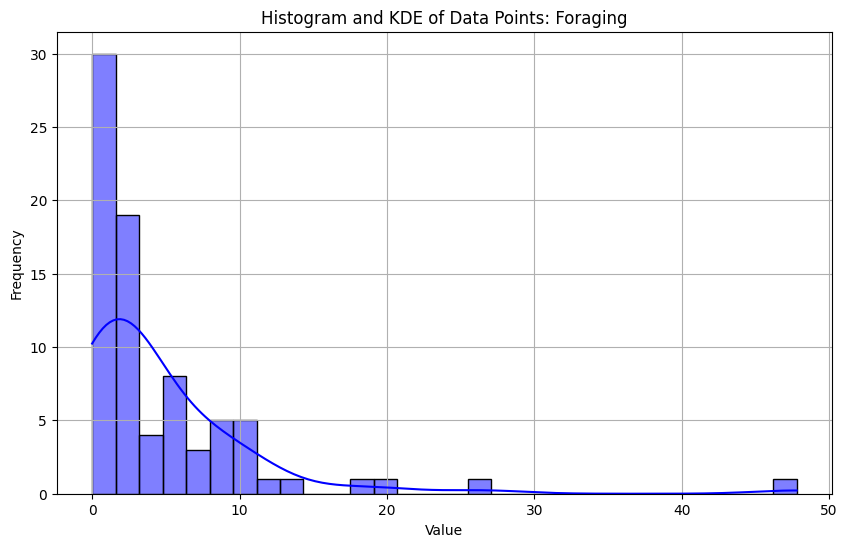

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for group, df in group_dfs.items():
    # Sample data
    data = df.avg_score.to_numpy()

    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.5)
    plt.title(f"Histogram and KDE of Data Points: {group}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [9]:
import plotly.express as px
import numpy as np

# Sample data
data = group_dfs["Aggregation"].avg_score.to_numpy()

# Create a KDE plot
# fig = px.density_contour(x=data, title='KDE Plot of Data Points', labels={'x': 'Value'})
# fig.update_layout(xaxis_title='Value', yaxis_title='Density')
# fig.show()

# Create a histogram
fig = px.histogram(data, nbins=30, title='Histogram of Data Points', labels={'value': 'Value'})
fig.update_layout(xaxis_title='Value', yaxis_title='Frequency')
fig.show()


## Coefficient of Variation Analysis

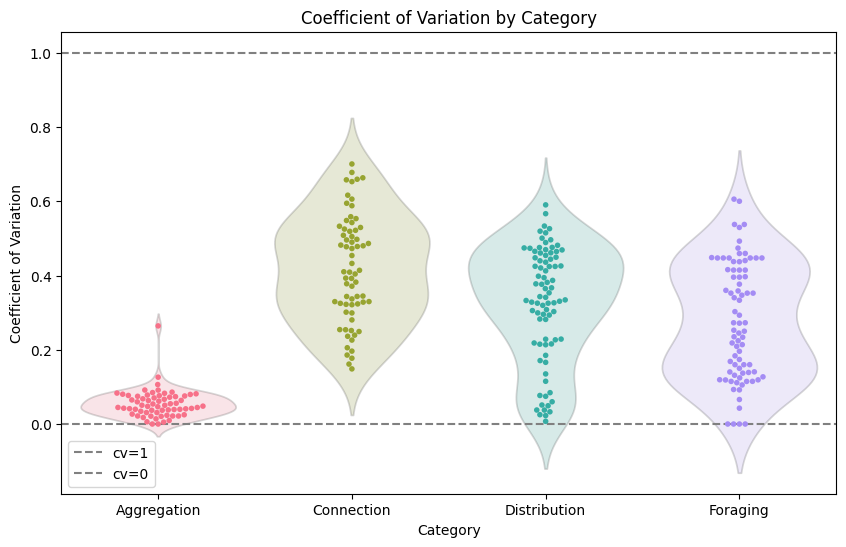

In [10]:
combined_df = pd.concat(
    [df.assign(category=category) for category, df in group_dfs.items()],
    ignore_index=True
)

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df, x='category', y='coeff_of_var', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df, x='category', y='coeff_of_var', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='cv=1')
plt.axhline(y=0, color='grey', linestyle='--', label='cv=0')

# Step 4: Customize the plot
plt.title('Coefficient of Variation by Category')
plt.xlabel('Category')
plt.ylabel('Coefficient of Variation')
plt.legend()  # Show legend for the horizontal line
plt.show()

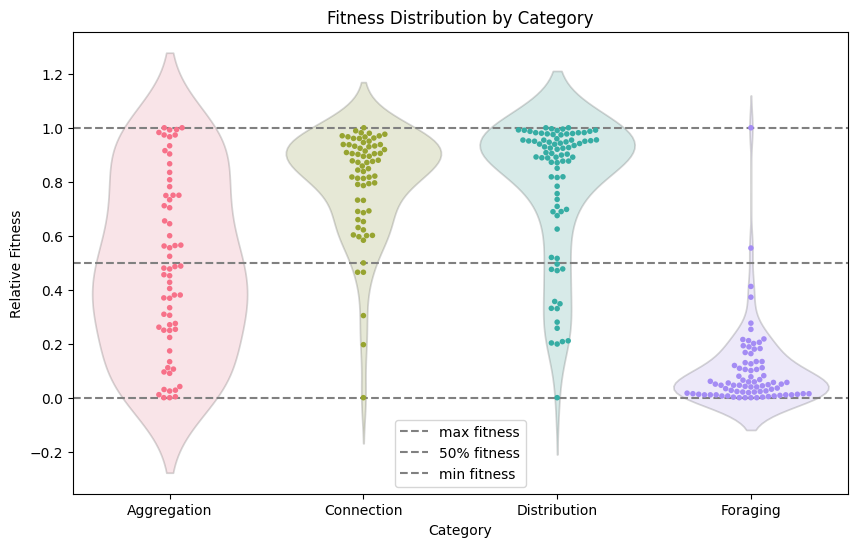

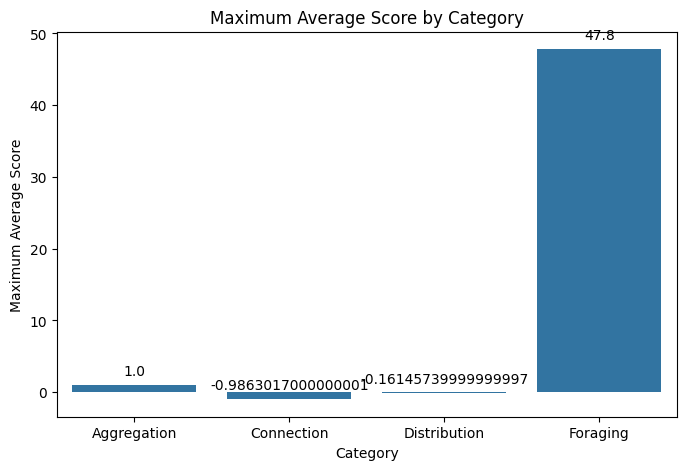

In [11]:
# Step 1: Calculate the max and min avg_score for each category
min_max_values = combined_df.groupby("category")["avg_score"].agg(['min', 'max']).reset_index()

# Step 2: Merge the min and max values back to the original DataFrame
combined_df_scaled = combined_df.merge(min_max_values, on="category")

# Step 3: Scale the avg_score to the range [0, 1]
combined_df_scaled['scaled_avg_score'] = (combined_df_scaled['avg_score'] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='max fitness')
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% fitness')
plt.axhline(y=0, color='grey', linestyle='--', label='min fitness')

# Step 4: Customize the plot
plt.title('Fitness Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Relative Fitness')
plt.legend()  # Show legend for the horizontal line
plt.show()

# Step 1: Calculate the maximum avg_score for each category
max_values = combined_df_scaled.groupby("category")["avg_score"].max().reset_index()
max_values.rename(columns={"avg_score": "max_avg_score"}, inplace=True)

# Step 2: Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

# Adding titles and labels
plt.title('Maximum Average Score by Category')
plt.xlabel('Category')
plt.ylabel('Maximum Average Score')

# Step 3: Annotate the bars with their respective values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset text
                      textcoords='offset points')

In [12]:
if "llm_avg_score" in combined_df.keys():
    scoreidx = "llm_avg_score"
    # Step 1: Calculate the max and min avg_score for each category
    min_max_values = combined_df.groupby("category")[scoreidx].agg(['min', 'max']).reset_index()

    # Step 2: Merge the min and max values back to the original DataFrame
    combined_df_scaled = combined_df.merge(min_max_values, on="category")

    # Step 3: Scale the avg_score to the range [0, 1]
    combined_df_scaled['scaled_avg_score'] = (combined_df_scaled[scoreidx] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

    plt.figure(figsize=(10, 6))

    # Define a color palette for the categories
    palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

    # Use violinplot to show the distribution of the data with colors
    sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category')

    # Overlay swarm plot to scatter individual points with colors
    sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

    # Add a horizontal line at y=1 (solid and black)
    plt.axhline(y=1, color='grey', linestyle='--', label='max fitness')
    plt.axhline(y=0.5, color='grey', linestyle='--', label='50% fitness')
    plt.axhline(y=0, color='grey', linestyle='--', label='min fitness')

    # Step 4: Customize the plot
    plt.title('Fitness Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Relative Fitness')
    plt.legend()  # Show legend for the horizontal line
    plt.show()

    # Step 1: Calculate the maximum avg_score for each category
    max_values = combined_df_scaled.groupby("category")[scoreidx].max().reset_index()
    max_values.rename(columns={scoreidx: "max_avg_score"}, inplace=True)

    # Step 2: Create a bar plot using Seaborn
    plt.figure(figsize=(8, 5))
    bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

    # Adding titles and labels
    plt.title('Maximum Average Score by Category')
    plt.xlabel('Category')
    plt.ylabel('Maximum Average Score')

    # Step 3: Annotate the bars with their respective values
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 5),  # Offset text
                        textcoords='offset points')

In [15]:
topn = 25
for group, df in group_dfs.items():
    sorted_df = df.sort_values(by="avg_score", ascending=True)
    for index, row in sorted_df.head(topn).iterrows():
        print(group, "\t",f"{row.original_index:04}", f"{row.avg_score:07.2f}")

Aggregation 	 0055 0000.25
Aggregation 	 0240 0000.25
Aggregation 	 0249 0000.25
Aggregation 	 0128 0000.26
Aggregation 	 0271 0000.27
Aggregation 	 0082 0000.27
Aggregation 	 0023 0000.27
Aggregation 	 0162 0000.28
Aggregation 	 0180 0000.32
Aggregation 	 0293 0000.32
Aggregation 	 0047 0000.33
Aggregation 	 0072 0000.33
Aggregation 	 0221 0000.35
Aggregation 	 0275 0000.38
Aggregation 	 0112 0000.42
Aggregation 	 0258 0000.44
Aggregation 	 0139 0000.44
Aggregation 	 0279 0000.44
Aggregation 	 0183 0000.45
Aggregation 	 0173 0000.45
Aggregation 	 0095 0000.46
Aggregation 	 0222 0000.48
Aggregation 	 0060 0000.48
Aggregation 	 0116 0000.50
Aggregation 	 0253 0000.53
Connection 	 0172 -064.60
Connection 	 0268 -052.11
Connection 	 0040 -045.26
Connection 	 0171 -035.04
Connection 	 0190 -035.04
Connection 	 0215 -032.84
Connection 	 0012 -027.50
Connection 	 0110 -026.67
Connection 	 0250 -026.40
Connection 	 0077 -026.35
Connection 	 0237 -026.24
Connection 	 0063 -025.05
Connection 	 

In [14]:
topn = 25
for group, df in group_dfs.items():
    sorted_df = df.sort_values(by="llm_avg_score", ascending=True)
    for index, row in sorted_df.head(topn).iterrows():
        print(group, "\t",f"{row.original_index:04}", f"{row.llm_avg_score:07.2f}")

KeyError: 'llm_avg_score'